In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
X = pd.read_csv('data-logistic.csv', header=None)
y = X[X.columns[0]]
X.drop(X.columns[0] ,axis=1, inplace=True)
X.head()

,1,2
0,-0.663827,-0.138526
1,1.994596,2.468025
2,-1.247395,0.749425
3,2.309374,1.899836
4,0.849143,2.407750


## Logistic regression class

In [25]:
class LogisticRegression:
    """
        Takes arguments: 
        eta - learning rate
        n_iter - iterations threshold
        C - regularization multiplier
    """
    def __init__(self, eta=0.1, n_iter=10000, C=0):
        self.eta_ = eta
        self.n_iter_ = n_iter
        self.C_ = C
        
    def sigmoid(self, X):
        z = self.net_input(X)
        return (1 / (1 + np.exp(-z)))
    
    def net_input(self, X):
        return (X @ self.w_)
    
    def fit(self, X, y):
        self.errors_ = []
        self.w_ = np.zeros(X.shape[1])
        
        w_prev = self.w_
        for i in range(self.n_iter_):
            tmp = (1 - 1/(1 + np.exp(-y * self.net_input(X)))).reshape((205,1))
            self.w_ += self.eta_ * 1/y.size * (y @ (X * tmp)).sum() 
            - self.C_ * self.eta_ * self.w_
            self.errors_.append(self.loss_function(X, y))
            
            if np.sqrt((self.w_ - w_prev) @ (self.w_ - w_prev)) < 1e-5:
                break
            
            w_prev = self.w_
    
    def loss_function(self, X, y):
        return (1/y.size * np.log(1 + np.exp(-y * self.net_input(X))).sum() + 1/2 * self.C_ * self.w_ @ self.w_)
    
    def predict(self, X):                                      
        return np.where(self.sigmoid(X)>0.5, 1, -1)
    
    def predict_proba(self, X):
        return self.sigmoid(X)
    
    def score(self, y_pred, y_real):
        return (1 - sum(list(map(lambda x, y: x!=y, y_pred, y_real)))/y_real.shape[0])

### Function to plot decision regions and line that separates classes 

In [4]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

Here is how raw data looks

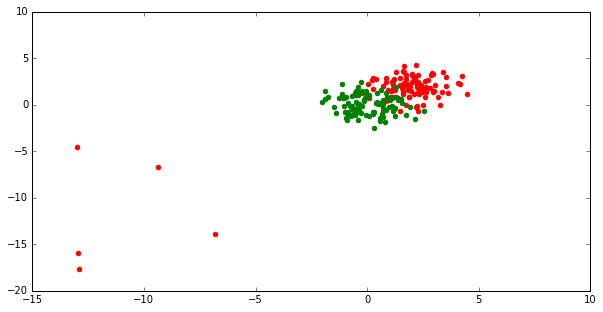

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.scatter(X.as_matrix()[y.as_matrix()==1, 0], X.as_matrix()[y.as_matrix()==1, 1], color='red')
plt.scatter(X.as_matrix()[y.as_matrix()==-1, 0], X.as_matrix()[y.as_matrix()==-1, 1], color='green')
plt.show()

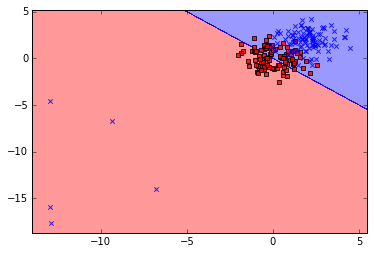

In [24]:
clf = LogisticRegression(C=0)
clf.fit(X.as_matrix(), y.as_matrix())
plot_decision_regions(X.as_matrix(), y.as_matrix(), clf)

0.935523809524


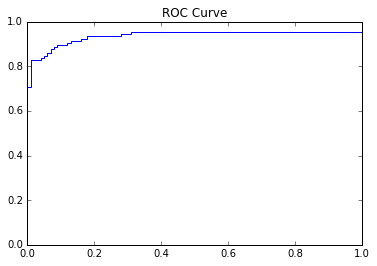

In [21]:
fpr, tpr, _ = roc_curve(y.as_matrix(), clf.predict_proba(X.as_matrix()))
print(roc_auc_score(y.as_matrix(), clf.predict_proba(X.as_matrix())))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.show()

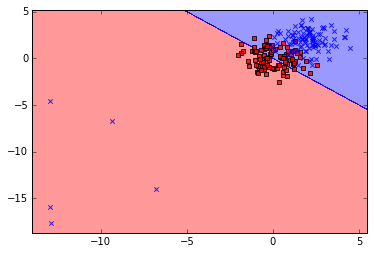

In [15]:
clf = LogisticRegression(C=10)
clf.fit(X.as_matrix(), y.as_matrix())
plot_decision_regions(X.as_matrix(), y.as_matrix(), clf)

0.935523809524


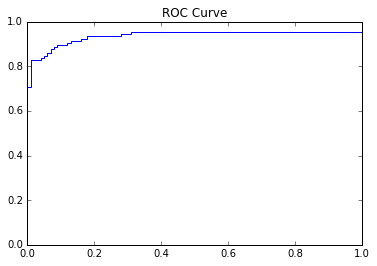

In [72]:
fpr, tpr, _ = roc_curve(y.as_matrix(), clf.predict_proba(X.as_matrix()))
print(roc_auc_score(y.as_matrix(), clf.predict_proba(X.as_matrix())))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.show()